In [ ]:
#https://distill.pub/2016/misread-tsne/

In [2]:
################# imports  ################
from os import listdir
from os.path import isfile, join
import pandas as pd

from io import StringIO
from io import BytesIO
#from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
from astropy.table import Table
import numpy as np
import pandas as pd
import os #biblioteca para manipular arquivos e pastas
from os import listdir
from os.path import isfile, join


In [3]:
################# Normalização do df ################
def minmax_norm(df_input):
    normalizacao = (df_input - df_input.min()) / ( df_input.max() - df_input.min())
    return normalizacao

In [4]:
################# análise TSNE  ################
from sklearn.manifold import TSNE

def tsne_analisys(data_to_analisys, perplexity, n_iter):
    tsne_analisys = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter).fit_transform(data_to_analisys)
    tsne_analisys = pd.DataFrame(tsne_analisys, columns = ['Eixo_x','Eixo_y'])
    return tsne_analisys

# Carregamento dos dados 

# Nova seção

## Match

In [ ]:
match_des_sloan_quasars_df = Table.read('/media/new-drive/CamilaCardoso/CROSS_MATCH_SLOAN_DR16_DES_20211029.fits').to_pandas()
ra_min = match_des_sloan_quasars_df['RA'].min()
ra_max = match_des_sloan_quasars_df['RA'].max()
dec_min = match_des_sloan_quasars_df['DEC'].min()
dec_max = match_des_sloan_quasars_df['DEC'].max()

In [7]:
path = '/content/drive/MyDrive/BINGO/BINGO/t-SNE analysis/SAMPLE/'
file_name = 'sample_per_npix_50_training.fits'
match_des_sloan_df = Table.read(path+file_name).to_pandas()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Des

In [ ]:
################# lê e concatena todas as tabelas que tem no diretório indicado ################
diretorio = '/media/new-drive/CamilaCardoso/DES/'
table_list = []
for diretorio, subpastas, arquivos in os.walk(diretorio):
    for arquivo in arquivos:
        df = Table.read(os.path.join(diretorio, arquivo)).to_pandas()
        df = df[df['RA']>= ra_min]
        df = df[df['RA']<= ra_max]
        df = df[df['DEC']>= dec_min]
        df = df[df['DEC']<= dec_max]
        table_list.append(df)
        print(os.path.join(diretorio, arquivo))
des_data_filtered = pd.concat(table_list, axis=0, ignore_index=True)

/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_0_1000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_1000_2000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_2000_3000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_3000_4000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_4000_5000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_5000_6000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_6000_6568.fits


In [ ]:
#faz um merge com os dados do gabarito que contém quasares
df = pd.merge(des_data_filtered,match_des_sloan_quasars_df[['COADD_OBJECT_ID','class']],on='COADD_OBJECT_ID', how='left')
df['class'] = df['class'].fillna('des_unclassified')
#df = df.sample(100000)
df = df.reset_index()
df['class'] = df['class'].astype(str)

In [31]:
df = match_des_sloan_df.copy()
df['class'] = df['class'].str.decode("utf-8")

In [ ]:
des_data_to_analysis  = df.copy()
des_data_to_analysis.drop(['COADD_OBJECT_ID','RA','DEC','HPIX_64','class'], axis=1, inplace=True)

#Normaliza o dataframe para análise 
des_data_to_analysis_normalized = minmax_norm(des_data_to_analysis)

In [29]:
df.keys()

Index(['Npix', 'specObjID', 'survey', 'instrument', 'class', 'ra', 'dec', 'z',
       'zErr', 'COADD_OBJECT_ID', 'RA', 'DEC', 'HPIX_64', 'CLASS_STAR_G',
       'CLASS_STAR_R', 'CLASS_STAR_I', 'CLASS_STAR_Z', 'CLASS_STAR_Y',
       'MAG_AUTO_G', 'MAG_AUTO_R', 'MAG_AUTO_I', 'MAG_AUTO_Z', 'MAG_AUTO_Y',
       'COLOR_g-r', 'COLOR_r-i', 'COLOR_i-z', 'COLOR_z-Y'],
      dtype='object')

In [32]:
des_data_to_analysis  = match_des_sloan_df.copy()
des_data_to_analysis.drop(['Npix', 'specObjID', 'survey', 'instrument', 'class', 'ra', 'dec', 'z',
       'zErr', 'COADD_OBJECT_ID', 'RA', 'DEC', 'HPIX_64', 'CLASS_STAR_G',
       'CLASS_STAR_R', 'CLASS_STAR_I', 'CLASS_STAR_Z', 'CLASS_STAR_Y'], axis=1, inplace=True)

#Normaliza o dataframe para análise 
des_data_to_analysis_normalized = minmax_norm(des_data_to_analysis)

# Amostras com variação por número de iteração: 1000, 2000, 3000, 4000, 5000 (perplexy = 40)

In [33]:
%%time
# perplexy = 40 iteração = 1000
perplexy = 40
iteracao = 1000
tsne_analysis_des_filtered_normalized_40_1000 = tsne_analisys(des_data_to_analysis_normalized,perplexy,iteracao)
tsne_analysis_des_filtered_normalized_gabarito_40_1000 = pd.merge(tsne_analysis_des_filtered_normalized_40_1000,df[['class']],left_index=True, right_index=True, how='left')
tsne_normalized_qso_40_1000 = tsne_analysis_des_filtered_normalized_gabarito_40_1000[tsne_analysis_des_filtered_normalized_gabarito_40_1000['class']=="QSO"]
tsne_normalized_stars_40_1000 = tsne_analysis_des_filtered_normalized_gabarito_40_1000[tsne_analysis_des_filtered_normalized_gabarito_40_1000['class']=="STAR"]
tsne_normalized_galaxy_40_1000 = tsne_analysis_des_filtered_normalized_gabarito_40_1000[tsne_analysis_des_filtered_normalized_gabarito_40_1000['class']=="GALAXY"]

CPU times: user 27min 41s, sys: 2.33 s, total: 27min 43s
Wall time: 7min 7s


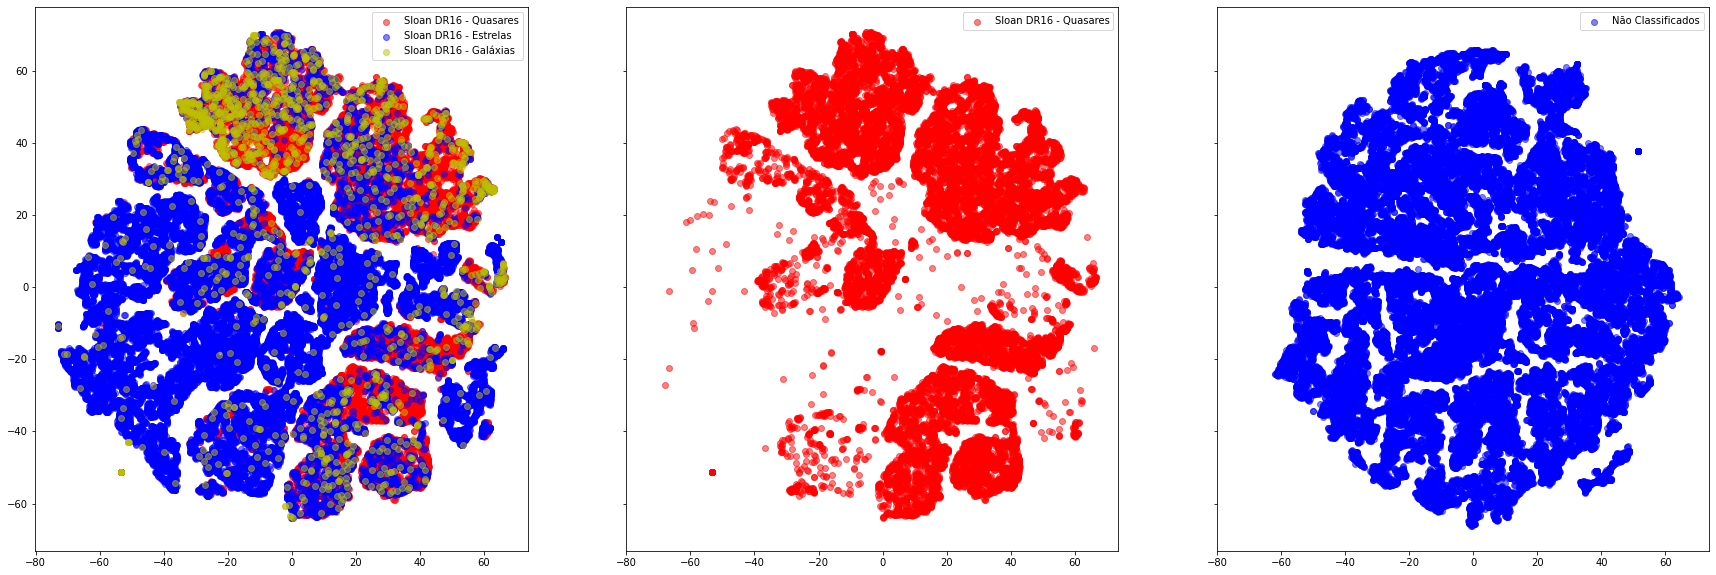

In [34]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
fig, ((ax1,ax2,ax3)) = plt.subplots(1 ,3 , sharex=True, sharey=True, figsize=(30,10))


ax1.scatter(tsne_normalized_qso_40_1000['Eixo_x'],tsne_normalized_qso_40_1000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax1.scatter(tsne_normalized_stars_40_1000['Eixo_x'],tsne_normalized_stars_40_1000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax1.scatter(tsne_normalized_galaxy_40_1000['Eixo_x'],tsne_normalized_galaxy_40_1000['Eixo_y'],c='y', alpha=0.5, label = 'Sloan DR16 - Galáxias')
#ax1.title.set_text('Amostra de objetos do DES localizados na região dada por \n {0} ≤ RA ≤ {1} e {2} ≤ DEC ≤ {3} com parâmetros do t-SNE: perp = {4} e n_iter = {5}'.format(ra_min,ra_max,dec_min,dec_max,1000,40))
ax1.legend()

ax2.scatter(tsne_normalized_qso_40_1000['Eixo_x'],tsne_normalized_qso_40_1000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
#ax2.title.set_text('Amostra de objetos do DES localizados na região dada por\n {0} ≤ RA ≤ {1} e {2} ≤ DEC ≤ {3} com parâmetros do t-SNE: perp = {4} e n_iter = {5}'.format(ra_min,ra_max,dec_min,dec_max,1000,40))
ax2.legend()

ax3.scatter(tsne_normalized_unclassified_40_1000['Eixo_x'],tsne_normalized_unclassified_40_1000['Eixo_y'],c='b', alpha=0.5, label = 'Não Classificados')
#ax3.title.set_text('Amostra de objetos do DES localizados na região dada por \n {0} ≤ RA ≤ {1} e {2} ≤ DEC ≤ {3} com parâmetros do t-SNE: perp = {4} e n_iter = {5}'.format(ra_min,ra_max,dec_min,dec_max,1000,40))
ax3.legend()

plt.show()


In [ ]:
tsne_analysis_merge_des_normalized_40_1000 = pd.merge(tsne_analysis_des_filtered_normalized_40_1000,df,left_index=True, right_index=True, how='left')
tsne_analysis_merge_des_normalized_40_1000_table = Table.from_pandas(tsne_analysis_merge_des_normalized_40_1000)
tsne_analysis_merge_des_normalized_40_1000_table.write('/media/new-drive/CamilaCardoso/Tsne_results/tsne_analysis_merge_des_normalized_40_1000.fits')

In [35]:
%%time
# perplexy = 40 iteração = 2000
perplexy = 40
iteracao = 2000
tsne_analysis_des_filtered_normalized_40_2000 = tsne_analisys(des_data_to_analysis_normalized,perplexy,iteracao)
tsne_analysis_des_filtered_normalized_gabarito_40_2000 = pd.merge(tsne_analysis_des_filtered_normalized_40_2000,df[['class']],left_index=True, right_index=True, how='left')
tsne_normalized_qso_40_2000 = tsne_analysis_des_filtered_normalized_gabarito_40_2000[tsne_analysis_des_filtered_normalized_gabarito_40_2000['class']=="QSO"]
tsne_normalized_star_40_2000 = tsne_analysis_des_filtered_normalized_gabarito_40_2000[tsne_analysis_des_filtered_normalized_gabarito_40_2000['class']=="STAR"]
tsne_normalized_galaxy_40_2000 = tsne_analysis_des_filtered_normalized_gabarito_40_2000[tsne_analysis_des_filtered_normalized_gabarito_40_2000['class']=="GALAXY"]

CPU times: user 52min 15s, sys: 4.53 s, total: 52min 19s
Wall time: 13min 20s


In [ ]:
tsne_analysis_merge_des_normalized_40_2000 = pd.merge(tsne_analysis_des_filtered_normalized_40_2000,df,left_index=True, right_index=True, how='left')
tsne_analysis_merge_des_normalized_40_2000_table = Table.from_pandas(tsne_analysis_merge_des_normalized_40_2000)
tsne_analysis_merge_des_normalized_40_2000_table.write('/media/new-drive/CamilaCardoso/Tsne_results/tsne_analysis_merge_des_normalized_40_2000.fits')

In [36]:
%%time
# perplexy = 40 iteração = 3000
perplexy = 40
iteracao = 3000
tsne_analysis_des_filtered_normalized_40_3000 = tsne_analisys(des_data_to_analysis_normalized,perplexy,iteracao)
tsne_analysis_des_filtered_normalized_gabarito_40_3000 = pd.merge(tsne_analysis_des_filtered_normalized_40_3000,df[['class']],left_index=True, right_index=True, how='left')
tsne_normalized_qso_40_3000 = tsne_analysis_des_filtered_normalized_gabarito_40_3000[tsne_analysis_des_filtered_normalized_gabarito_40_3000['class']=="QSO"]
tsne_normalized_star_40_3000 = tsne_analysis_des_filtered_normalized_gabarito_40_3000[tsne_analysis_des_filtered_normalized_gabarito_40_3000['class']=="STAR"]
tsne_normalized_galaxy_40_3000 = tsne_analysis_des_filtered_normalized_gabarito_40_3000[tsne_analysis_des_filtered_normalized_gabarito_40_3000['class']=="GALAXY"]


CPU times: user 1h 18min 32s, sys: 6.81 s, total: 1h 18min 39s
Wall time: 19min 58s


In [ ]:
tsne_analysis_merge_des_normalized_40_3000 = pd.merge(tsne_analysis_des_filtered_normalized_40_3000,df,left_index=True, right_index=True, how='left')
tsne_analysis_merge_des_normalized_40_3000_table = Table.from_pandas(tsne_analysis_merge_des_normalized_40_3000)
tsne_analysis_merge_des_normalized_40_3000_table.write('/media/new-drive/CamilaCardoso/Tsne_results/tsne_analysis_merge_des_normalized_40_3000.fits')

In [ ]:
%%time
# perplexy = 40 iteração = 4000
perplexy = 40
iteracao = 4000
tsne_analysis_des_filtered_normalized_40_4000 = tsne_analisys(des_data_to_analysis_normalized,perplexy,iteracao)
tsne_analysis_des_filtered_normalized_gabarito_40_4000 = pd.merge(tsne_analysis_des_filtered_normalized_40_4000,df[['class']],left_index=True, right_index=True, how='left')
tsne_normalized_qso_40_4000 = tsne_analysis_des_filtered_normalized_gabarito_40_4000[tsne_analysis_des_filtered_normalized_gabarito_40_4000['class']=="QSO"]
tsne_normalized_star_40_4000 = tsne_analysis_des_filtered_normalized_gabarito_40_4000[tsne_analysis_des_filtered_normalized_gabarito_40_4000['class']=="STAR"]
tsne_normalized_galaxy_40_4000 = tsne_analysis_des_filtered_normalized_gabarito_40_4000[tsne_analysis_des_filtered_normalized_gabarito_40_4000['class']=="GALAXY"]

In [ ]:
tsne_analysis_merge_des_normalized_40_4000 = pd.merge(tsne_analysis_des_filtered_normalized_40_4000,df,left_index=True, right_index=True, how='left')
tsne_analysis_merge_des_normalized_40_4000_table = Table.from_pandas(tsne_analysis_merge_des_normalized_40_4000)
tsne_analysis_merge_des_normalized_40_4000_table.write('/media/new-drive/CamilaCardoso/Tsne_results/tsne_analysis_merge_des_normalized_40_4000.fits')

In [ ]:
%%time
# perplexy = 40 iteração = 5000
perplexy = 40
iteracao = 5000
tsne_analysis_des_filtered_normalized_40_5000 = tsne_analisys(des_data_to_analysis_normalized,perplexy,iteracao)
tsne_analysis_des_filtered_normalized_gabarito_40_5000 = pd.merge(tsne_analysis_des_filtered_normalized_40_5000,df[['class']],left_index=True, right_index=True, how='left')
tsne_normalized_qso_40_5000 = tsne_analysis_des_filtered_normalized_gabarito_40_5000[tsne_analysis_des_filtered_normalized_gabarito_40_5000['class']=="QSO"]
tsne_normalized_star_40_5000 = tsne_analysis_des_filtered_normalized_gabarito_40_5000[tsne_analysis_des_filtered_normalized_gabarito_40_5000['class']=="STAR"]
tsne_normalized_galaxy_40_5000 = tsne_analysis_des_filtered_normalized_gabarito_40_5000[tsne_analysis_des_filtered_normalized_gabarito_40_5000['class']=="GALAXY"]

CPU times: user 4h 43min 48s, sys: 11min 8s, total: 4h 54min 56s
Wall time: 31min 50s


In [ ]:
tsne_analysis_merge_des_normalized_40_5000 = pd.merge(tsne_analysis_des_filtered_normalized_40_5000,df,left_index=True, right_index=True, how='left')
tsne_analysis_merge_des_normalized_40_5000_table = Table.from_pandas(tsne_analysis_merge_des_normalized_40_5000)
tsne_analysis_merge_des_normalized_40_5000_table.write('/media/new-drive/CamilaCardoso/Tsne_results/tsne_analysis_merge_des_normalized_40_5000.fits')

NameError: ignored

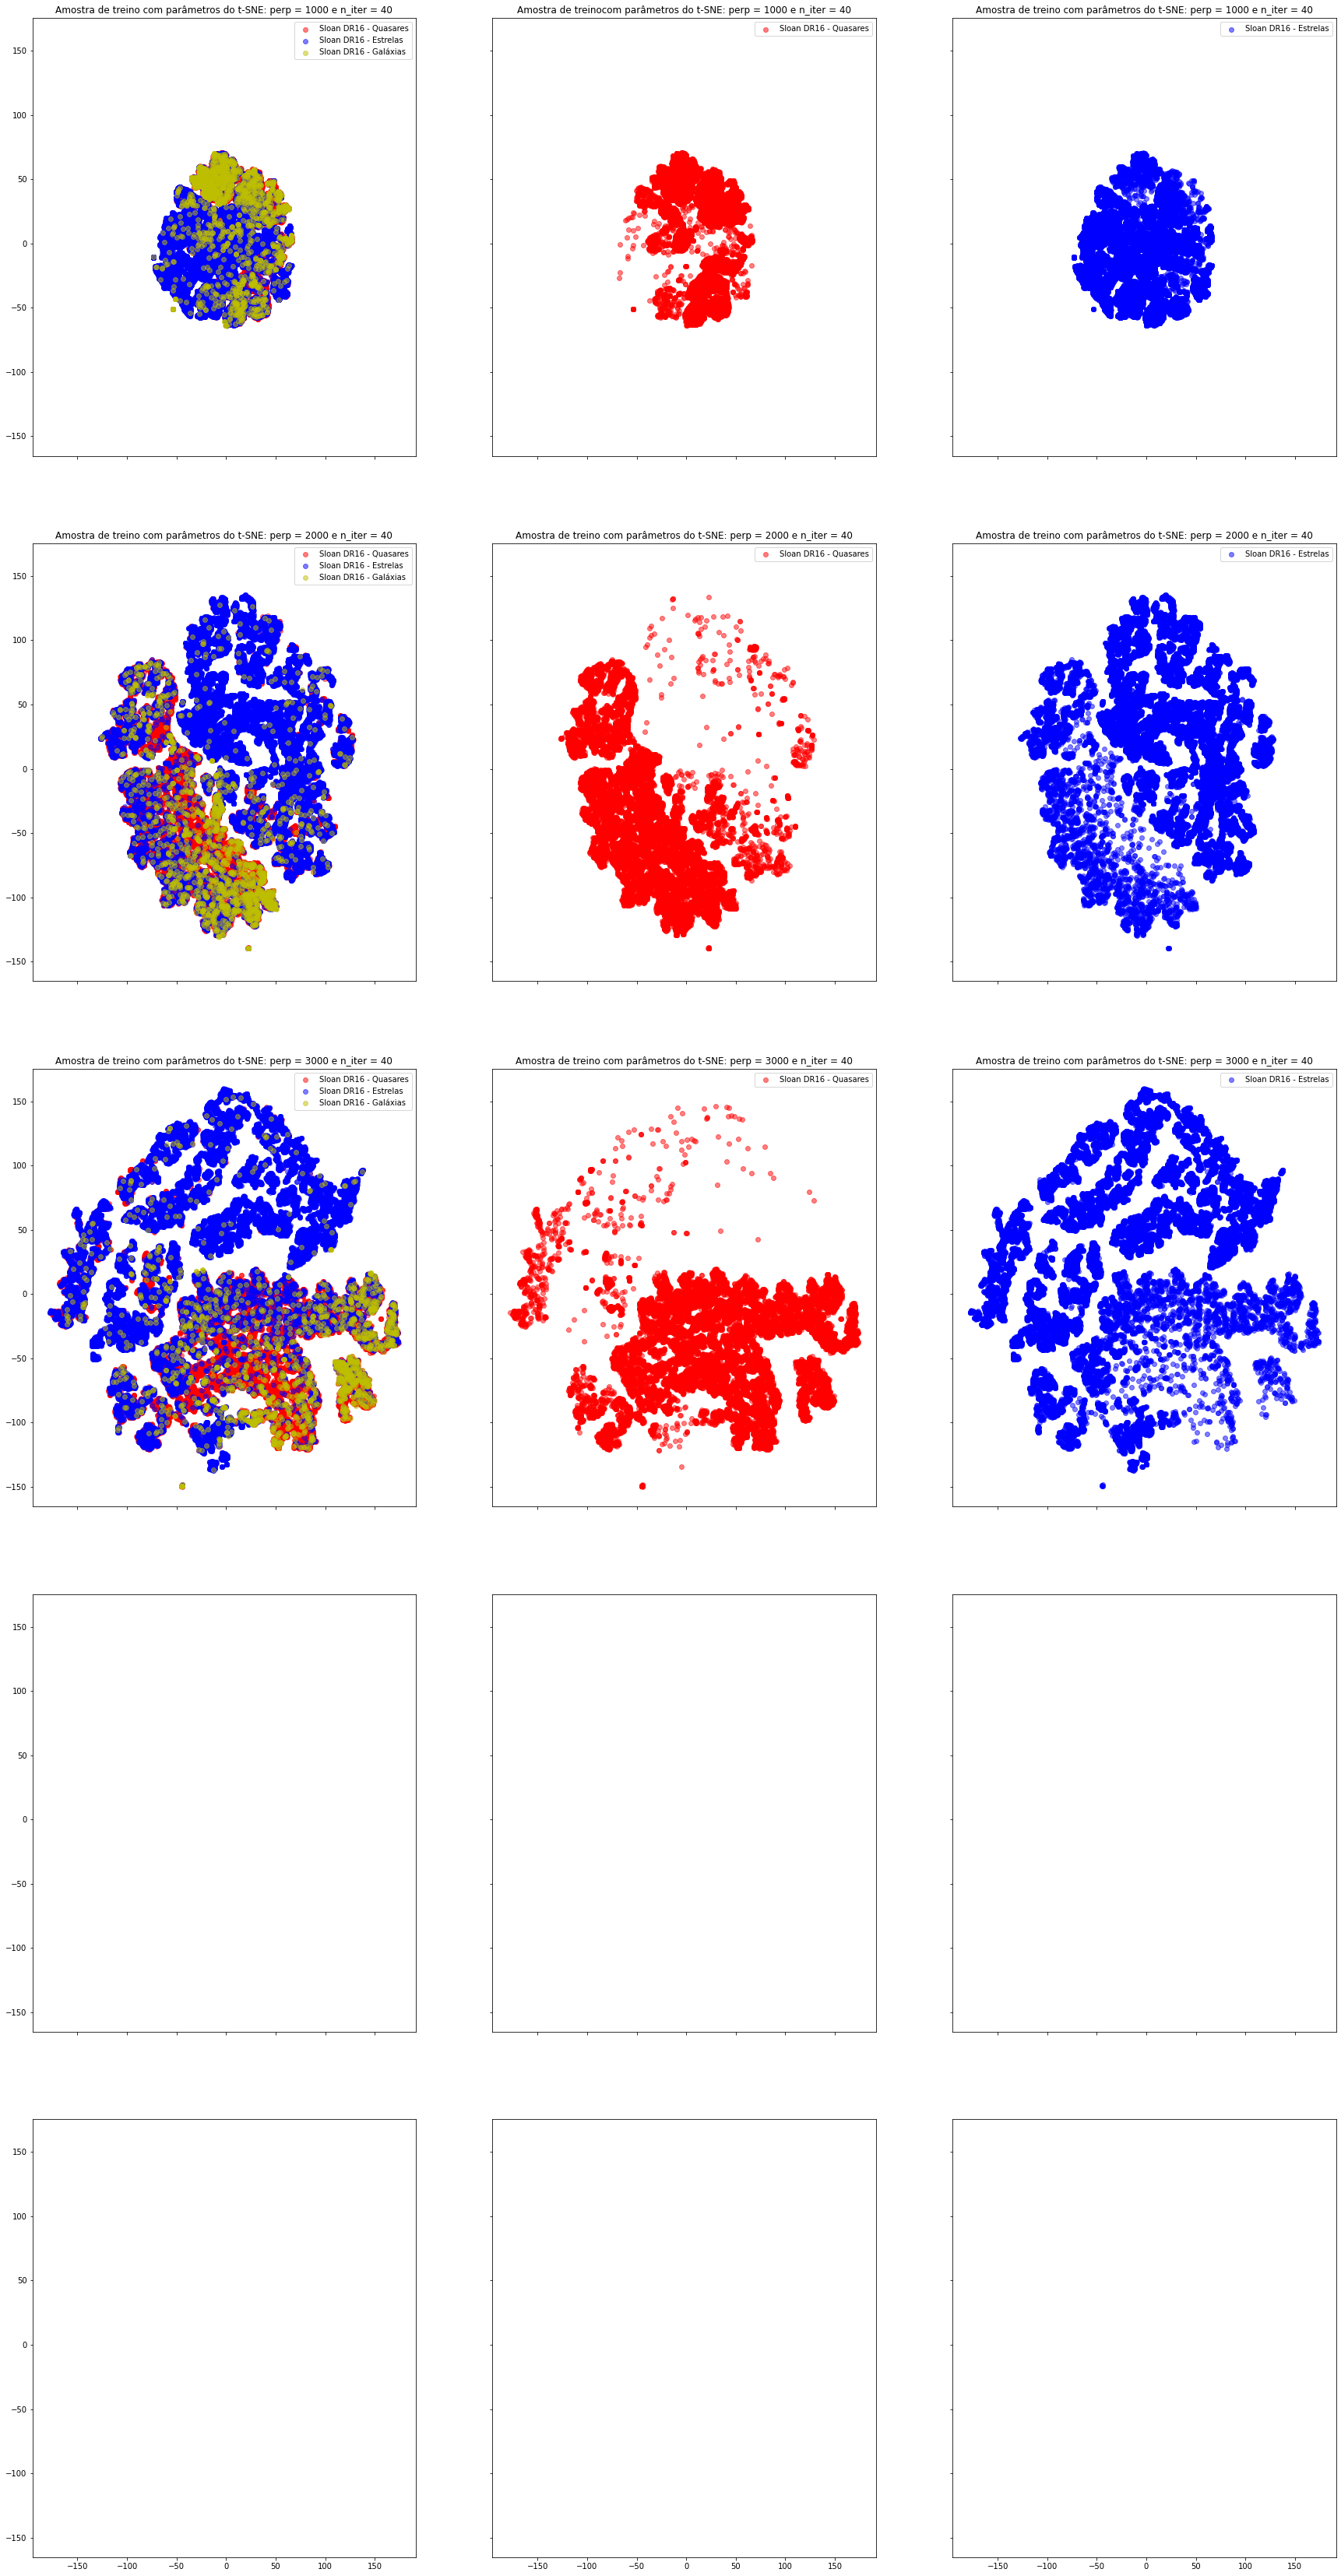

In [40]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
fig, ((ax1,ax2,ax3), (ax4, ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5 ,3 , sharex=True, sharey=True, figsize=(30,60))

tipo_de_amostra = 'treino'

ax1.scatter(tsne_normalized_qso_40_1000['Eixo_x'],tsne_normalized_qso_40_1000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax1.scatter(tsne_normalized_stars_40_1000['Eixo_x'],tsne_normalized_stars_40_1000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax1.scatter(tsne_normalized_galaxy_40_1000['Eixo_x'],tsne_normalized_galaxy_40_1000['Eixo_y'],c='y', alpha=0.5, label = 'Sloan DR16 - Galáxias')
ax1.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(1000,40))
ax1.legend()

ax2.scatter(tsne_normalized_qso_40_1000['Eixo_x'],tsne_normalized_qso_40_1000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax2.title.set_text('Amostra de '+ tipo_de_amostra+'com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(1000,40))
ax2.legend()

ax3.scatter(tsne_normalized_stars_40_1000['Eixo_x'],tsne_normalized_stars_40_1000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax3.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(1000,40))
ax3.legend()

ax4.scatter(tsne_normalized_qso_40_2000['Eixo_x'],tsne_normalized_qso_40_2000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax4.scatter(tsne_normalized_star_40_2000['Eixo_x'],tsne_normalized_star_40_2000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax4.scatter(tsne_normalized_galaxy_40_2000['Eixo_x'],tsne_normalized_galaxy_40_2000['Eixo_y'],c='y', alpha=0.5, label = 'Sloan DR16 - Galáxias')
ax4.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(2000,40))
ax4.legend()

ax5.scatter(tsne_normalized_qso_40_2000['Eixo_x'],tsne_normalized_qso_40_2000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax5.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(2000,40))
ax5.legend()

ax6.scatter(tsne_normalized_star_40_2000['Eixo_x'],tsne_normalized_star_40_2000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax6.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(2000,40))
ax6.legend()

ax7.scatter(tsne_normalized_qso_40_3000['Eixo_x'],tsne_normalized_qso_40_3000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax7.scatter(tsne_normalized_star_40_3000['Eixo_x'],tsne_normalized_star_40_3000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax7.scatter(tsne_normalized_galaxy_40_3000['Eixo_x'],tsne_normalized_galaxy_40_3000['Eixo_y'],c='y', alpha=0.5, label = 'Sloan DR16 - Galáxias')
ax7.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(3000,40))
ax7.legend()

ax8.scatter(tsne_normalized_qso_40_3000['Eixo_x'],tsne_normalized_qso_40_3000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax8.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(3000,40))
ax8.legend()

ax9.scatter(tsne_normalized_star_40_3000['Eixo_x'],tsne_normalized_star_40_3000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax9.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(3000,40))
ax9.legend()

ax10.scatter(tsne_normalized_qso_40_4000['Eixo_x'],tsne_normalized_qso_40_4000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax10.scatter(tsne_normalized_star_40_4000['Eixo_x'],tsne_normalized_star_40_4000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax10.scatter(tsne_normalized_galaxy_40_4000['Eixo_x'],tsne_normalized_galaxy_40_4000['Eixo_y'],c='y', alpha=0.5, label = 'Sloan DR16 - Galáxias')
ax10.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(4000,40))
ax10.legend()

ax11.scatter(tsne_normalized_qso_40_4000['Eixo_x'],tsne_normalized_qso_40_4000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax11.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(4000,40))
ax11.legend()

ax12.scatter(tsne_normalized_star_40_4000['Eixo_x'],tsne_normalized_star_40_4000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax12.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(4000,40))
ax12.legend()

ax13.scatter(tsne_normalized_qso_40_5000['Eixo_x'],tsne_normalized_qso_40_5000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax13.scatter(tsne_normalized_star_40_5000['Eixo_x'],tsne_normalized_star_40_5000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax13.scatter(tsne_normalized_galaxy_40_5000['Eixo_x'],tsne_normalized_galaxy_40_5000['Eixo_y'],c='y', alpha=0.5, label = 'Sloan DR16 - Galáxias')
ax13.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(5000,40))
ax13.legend()

ax14.scatter(tsne_normalized_qso_40_5000['Eixo_x'],tsne_normalized_qso_40_5000['Eixo_y'],c='r',alpha=0.5, label = 'Sloan DR16 - Quasares')
ax14.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(5000,40))
ax14.legend()

ax14.scatter(tsne_normalized_stars_40_5000['Eixo_x'],tsne_normalized_stars_40_5000['Eixo_y'],c='b', alpha=0.5, label = 'Sloan DR16 - Estrelas')
ax14.title.set_text('Amostra de '+tipo_de_amostra+' com parâmetros do t-SNE: perp = {0} e n_iter = {1}'.format(5000,40))
ax14.legend()

plt.savefig('tsne_analisys_sample_20211030.png', format='png')
plt.show()

## Plot

In [ ]:
Nside = 64
Npix = hp.nside2npix(Nside) # Definição de Npix - 12*(Nside)**2

# Criando um dataframe para a plotagem do mollview 
pixels_location = pd.DataFrame()
pixels_location['indices'] = np.arange(Npix)

In [ ]:
match_pixels_location = pd.DataFrame()
match_pixels_location['indices'] = match_des_sloan_quasars['Npix']
match_pixels_grouped = match_pixels_location.groupby(['indices']).size().reset_index(name='counts')

match_pixels_frequency = pd.merge(pixels_location, match_pixels_grouped, how = 'outer')
match_pixels_frequency = match_pixels_frequency.fillna(0) 

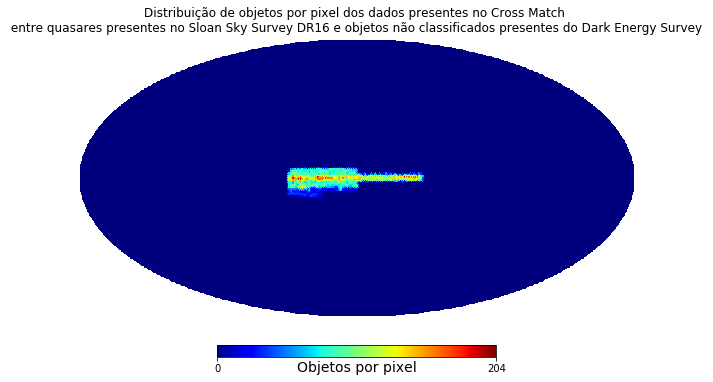

In [ ]:
plt.figure(figsize=(10,10))
hp.mollview(match_pixels_frequency.counts.values, title="Distribuição de objetos por pixel dos dados presentes no Cross Match \n entre quasares presentes no Sloan Sky Survey DR16 e objetos não classificados presentes do Dark Energy Survey ", unit='Objetos por pixel', cmap='jet', hold =True )
plt.show()

In [ ]:
def filtragem_colunas(resultado):    
    #Converte o resultado do match em um data frame pandas
    result = resultado.to_pandas()

    # Adiciona uma coluna chamada flag z<=0.002 -> flag = 1 z>0.002 flag = 0
    result['flag'] = result['z'].apply(lambda x: 1 if x<=0.002  else 0)



    #Cria um dataframe pandas novo e insere somente os dados relativos às magnitudes
    data_to_analisys = pd.DataFrame()
    data_to_analisys['MAG_AUTO_G'] = result['MAG_AUTO_G']
    data_to_analisys['MAG_AUTO_R'] = result['MAG_AUTO_R']
    data_to_analisys['MAG_AUTO_I'] = result['MAG_AUTO_I']
    data_to_analisys['MAG_AUTO_Z'] = result['MAG_AUTO_Z']
    data_to_analisys['MAG_AUTO_Y'] = result['MAG_AUTO_Y']
    return data_to_analisys, result